In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time    : 2020/1/13 16:28
# @Author  : Shark
# @Site    :
# @File    : tsts_trainer.py
# @Software: PyCharm

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# On CPU/GPU placement
config = tf.compat.v1.ConfigProto(allow_soft_placement=True, log_device_placement=True)
config.gpu_options.allow_growth = True
tf.compat.v1.Session(config=config)


2.0.0
Num GPUs Available:  1
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN RTX, pci bus id: 0000:04:00.0, compute capability: 7.5



In [2]:
from kashgari.trainer.sampler_multi_task_trainer import SamplerMultiTaskTrainer
from kashgari.task import ReadabilityTask, NerTask, AlluSourceTask,AlluClassTask
from kashgari.processors import ClassificationProcessor, LabelingProcessor

poem_seq_len = 30
task_list = []



processor = ClassificationProcessor(vocab_path="../pretrained_embedding/bert/poem_chinese_L-12_H-768_A-12/")
allu_class_task = AlluClassTask(processor,
                                "./allusion_corpus",
                                poem_seq_len)
task_list.append(allu_class_task)

processor = LabelingProcessor(vocab_path="../pretrained_embedding/bert/poem_chinese_L-12_H-768_A-12/")
ner_task = NerTask(processor,
                   "./allusion_corpus",
                   poem_seq_len)
task_list.append(ner_task)




Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN RTX, pci bus id: 0000:04:00.0, compute capability: 7.5



I:LOAD NER CORPUS:[ner_task.p: 65]:loaded 21596 samples from ./allusion_corpus/train.data. Samples:
x[0]: ['纶', '綍', '谋', '猷', '盛', ',', '丹', '青', '步', '武', '亲', '。']
y[0]: ['B-ALLU', 'I-ALLU', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [3]:
allu_def_seq_len = poem_seq_len
trainer = SamplerMultiTaskTrainer(task_list=task_list,
                                  batch_size=64,
                                  total_epochs=50,
                                  poem_seq_len=poem_seq_len,
                                  allu_def_seq_len=allu_def_seq_len)

final_res = trainer.train()


I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:0:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-06-10_16_41/0/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, validate on 2592 samples
I:BASE-MODEL:[base_model:133]:ALLU_CLASS's model_dir is ./model_ckpt/2020-02-06-10_16_41/0/ALLU_CLASS-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_CLASS]:train info:Train

Epoch 1/50
259/259 [==============================] - 131s 505ms/step - task_name: ALLU_CLASS  - loss: 2.1102 - accuracy: 0.2452 - val_loss: 2.5237 - val_accuracy: 0.2969 


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
259/259 [==============================] - 66s 255ms/step - task_name: ALLU_CLASS  - loss: 2.0935 - accuracy: 0.3649 - val_loss: 2.2290 - val_accuracy: 0.3880 


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
259/259 [==============================] - 66s 253ms/step - task_name: ALLU_CLASS  - loss: 1.9724 - accuracy: 0.4476 - val_loss: 2.0892 - val_accuracy: 0.4089


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
259/259 [==============================] - 66s 254ms/step - task_name: ALLU_CLASS  - loss: 1.5522 - accuracy: 0.5297 - val_loss: 2.0799 - val_accuracy: 0.4323


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
259/259 [==============================] - 69s 266ms/step - task_name: ALLU_CLASS  - loss: 1.4729 - accuracy: 0.5724 - val_loss: 2.0834 - val_accuracy: 0.4349


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
259/259 [==============================] - 66s 255ms/step - task_name: ALLU_CLASS  - loss: 1.1452 - accuracy: 0.6315 - val_loss: 2.1470 - val_accuracy: 0.4271


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
259/259 [==============================] - 69s 265ms/step - task_name: ALLU_CLASS  - loss: 1.0493 - accuracy: 0.6433 - val_loss: 2.2249 - val_accuracy: 0.4219


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
259/259 [==============================] - 68s 261ms/step - task_name: ALLU_CLASS  - loss: 0.9912 - accuracy: 0.7216 - val_loss: 2.2888 - val_accuracy: 0.4323


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
259/259 [==============================] - 68s 264ms/step - task_name: ALLU_CLASS  - loss: 0.8442 - accuracy: 0.7746 - val_loss: 2.4024 - val_accuracy: 0.4323


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
259/259 [==============================] - 6s 22ms/step - task_name: ALLU_CLASS  - loss: 0.8250 - accuracy: 0.7008 - val_loss: 2.3871 - val_accuracy: 0.4062


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
259/259 [==============================] - 6s 25ms/step - task_name: ALLU_CLASS  - loss: 0.7682 - accuracy: 0.7702 - val_loss: 2.4471 - val_accuracy: 0.4010


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
259/259 [==============================] - 6s 23ms/step - task_name: ALLU_CLASS  - loss: 0.5608 - accuracy: 0.8320 - val_loss: 2.5785 - val_accuracy: 0.3932


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.825625 precision: 0.473143, recall: 0.330554, f1: 0.389200

           precision    recall  f1-score   support

     ALLU     0.4731    0.3306    0.3892      4317

micro avg     0.4731    0.3306    0.3892      4317
macro avg     0.4731    0.3306    0.3892      4317

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:客 道 耻 摇 尾 , 皇 恩 宽 犯 鳞 。
y_pred:O O O O O O O O O B-ALLU I-ALLU O
y_true:O O O B-ALLU I-ALLU O O O O O O O
----------
x_seq:闻 道 飞 [UNK] 向 洛 阳 , 翩 翩 矫 [UNK] 度 文 昌 。
y_pred:O O O O O O O O O O O O O O O O
y_true:O O O B-ALLU O O O O O O O O O O O O
----------
x_seq:王 湛 床 头 见 周 易 , 长 康 传 里 好 丹 青 。
y_pred:B-ALLU I-ALLU I-ALLU I-ALLU I-ALLU I-ALLU I-ALLU O O O O O O O O O
y_true:O O B-ALLU I-ALLU I-ALLU I-ALLU I-ALLU O O O O O O O O O
----------
x_seq:他 时 干 蛊 声 名 著

/home/liulei/anaconda3/envs/ner_tf2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/liulei/anaconda3/envs/ner_tf2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/liulei/anaconda3/envs/ner_tf2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



----------------------------------ALLU_CLASS CLASS METRICS -----------------------------------

              precision    recall  f1-score   support
    accuracy                         0.2940       534
   macro avg     0.2055    0.1293    0.1103       534
weighted avg     0.2600    0.2940    0.2183       534


epoch:classification EPOCH accuracy: 0.2940074906367041 precision: 0.205518, recall: 0.129278, f1: 0.110260

-----------------------------ALLU_CLASS END ----------------------------


I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 0th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches


train_example:**************************************************
x_seq:入 楚 廉 颇 犹 未 老 ， 过 秦 扁 鹊 更 能 工 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:人物部
----------
x_seq:将 征 任 土 贡 ， 更 发 济 川 舟 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:器用部
y_true:器用部
----------
x_seq:端 拱 复 垂 裳 ， 长 怀 御 远 方 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:器用部
y_true:人物部
----------
x_seq:想 是 三 刀 梦 ， 森 然 在 眼 然 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:人事部
----------
x_seq:夜 深 一 片 城 头 月 ， 曾 照 张 良 案 上 筹 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:器用部
y_true:人物部
----------
x_seq:神 女 生 涯 原 是 梦 ， 小 姑 居 处 本 无 郎 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:九流部
----

I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:1:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-06-10_16_41/1/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, validate on 2592 samples
I:BASE-MODEL:[base_model:133]:ALLU_CLASS's model_dir is ./model_ckpt/2020-02-06-10_16_41/1/ALLU_CLASS-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_CLASS]:train info:Train on 1813 samples, validate on 321 samples


Epoch 1/50
259/259 [==============================] - 125s 482ms/step - task_name: ALLU_CLASS  - loss: 1.7743 - accuracy: 0.2422 - val_loss: 2.5048 - val_accuracy: 0.3073 


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
259/259 [==============================] - 68s 264ms/step - task_name: ALLU_CLASS  - loss: 1.9831 - accuracy: 0.3648 - val_loss: 2.2278 - val_accuracy: 0.3802 


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
259/259 [==============================] - 66s 255ms/step - task_name: ALLU_CLASS  - loss: 1.6016 - accuracy: 0.4392 - val_loss: 2.1900 - val_accuracy: 0.3854 


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
259/259 [==============================] - 66s 253ms/step - task_name: ALLU_CLASS  - loss: 1.7153 - accuracy: 0.4934 - val_loss: 2.2291 - val_accuracy: 0.3698 


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
259/259 [==============================] - 66s 254ms/step - task_name: ALLU_CLASS  - loss: 1.3541 - accuracy: 0.5533 - val_loss: 2.2780 - val_accuracy: 0.4036 


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
259/259 [==============================] - 65s 253ms/step - task_name: ALLU_CLASS  - loss: 1.2744 - accuracy: 0.5983 - val_loss: 2.3644 - val_accuracy: 0.3984 


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
259/259 [==============================] - 65s 252ms/step - task_name: ALLU_CLASS  - loss: 1.2704 - accuracy: 0.6680 - val_loss: 2.3868 - val_accuracy: 0.3542 


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
259/259 [==============================] - 66s 253ms/step - task_name: ALLU_CLASS  - loss: 0.7914 - accuracy: 0.7113 - val_loss: 2.5163 - val_accuracy: 0.3854


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
259/259 [==============================] - 66s 255ms/step - task_name: ALLU_CLASS  - loss: 0.6240 - accuracy: 0.7269 - val_loss: 2.5858 - val_accuracy: 0.3542


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
259/259 [==============================] - 66s 254ms/step - task_name: ALLU_CLASS  - loss: 0.5097 - accuracy: 0.7773 - val_loss: 2.6433 - val_accuracy: 0.3750


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
259/259 [==============================] - 66s 255ms/step - task_name: ALLU_CLASS  - loss: 0.6295 - accuracy: 0.7963 - val_loss: 2.7035 - val_accuracy: 0.3932


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
259/259 [==============================] - 6s 25ms/step - task_name: ALLU_CLASS  - loss: 0.8417 - accuracy: 0.7260 - val_loss: 2.6328 - val_accuracy: 0.3750


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.832276 precision: 0.335332, recall: 0.194393, f1: 0.246113

           precision    recall  f1-score   support

     ALLU     0.3357    0.1944    0.2462      4316

micro avg     0.3353    0.1944    0.2461      4316
macro avg     0.3357    0.1944    0.2462      4316

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:未 及 冯 公 老 , 何 惊 孺 子 贫 。
y_pred:O O O O O O O O O O O O
y_true:O O O O O O O O B-ALLU I-ALLU I-ALLU O
----------
x_seq:心 穷 伏 火 阳 精 丹 , 口 涌 淮 王 万 毕 术 。
y_pred:O O O O O O O O O O O O O O O O
y_true:O O O O O O O O O O B-ALLU I-ALLU O O O O
----------
x_seq:旧 苑 经 寒 露 , 残 池 问 劫 灰 。
y_pred:O O O O O O O O O O O O
y_true:O O O O O O O O O B-ALLU I-ALLU O
----------
x_seq:河 冻 未 渔 不 易 得 , 凿 冰 筑 侵 河 伯 宫 。
y_pred:O O O O O O O O O O O O O O O O
y_true:B-ALLU I-ALLU I-A

/home/liulei/anaconda3/envs/ner_tf2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/liulei/anaconda3/envs/ner_tf2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/liulei/anaconda3/envs/ner_tf2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



----------------------------------ALLU_CLASS CLASS METRICS -----------------------------------

              precision    recall  f1-score   support
    accuracy                         0.2697       534
   macro avg     0.0867    0.1229    0.0986       534
weighted avg     0.1661    0.2697    0.1990       534


epoch:classification EPOCH accuracy: 0.2696629213483146 precision: 0.086706, recall: 0.122924, f1: 0.098571

-----------------------------ALLU_CLASS END ----------------------------


I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 1th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches


train_example:**************************************************
x_seq:鲤 庭 传 事 业 ， 鸡 树 遂 翱 翔 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:动物部
y_true:器用部
----------
x_seq:好 同 姑 射 称 仙 子 ， 会 到 罗 浮 化 美 人 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人物部
y_true:九流部
----------
x_seq:黔 娄 固 穷 士 ， 妻 贤 忘 其 贫 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:伦类部
----------
x_seq:飞 燕 皇 后 轻 身 舞 ， 紫 官 夫 人 绝 世 歌 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人物部
y_true:文明部
----------
x_seq:送 君 应 典 [UNK] [UNK] 裘 ， 凭 仗 千 钟 洗 别 愁 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:器用部
y_true:器用部
----------
x_seq:十 载 王 [UNK] 泪 ， 重 沾 柏 叶 新 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_t

I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:2:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-06-10_16_41/2/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, validate on 2592 samples
I:BASE-MODEL:[base_model:133]:ALLU_CLASS's model_dir is ./model_ckpt/2020-02-06-10_16_41/2/ALLU_CLASS-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_CLASS]:train info:Train on 1813 samples, validate on 321 samples


Epoch 1/50
259/259 [==============================] - 126s 486ms/step - task_name: ALLU_CLASS  - loss: 1.8305 - accuracy: 0.2237 - val_loss: 2.7815 - val_accuracy: 0.2057


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
259/259 [==============================] - 66s 254ms/step - task_name: ALLU_CLASS  - loss: 2.0922 - accuracy: 0.3041 - val_loss: 2.6239 - val_accuracy: 0.2734


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
259/259 [==============================] - 68s 261ms/step - task_name: ALLU_CLASS  - loss: 1.8129 - accuracy: 0.3588 - val_loss: 2.5853 - val_accuracy: 0.2734


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
259/259 [==============================] - 66s 253ms/step - task_name: ALLU_CLASS  - loss: 1.9162 - accuracy: 0.4133 - val_loss: 2.4728 - val_accuracy: 0.2969


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
259/259 [==============================] - 66s 253ms/step - task_name: ALLU_CLASS  - loss: 1.6304 - accuracy: 0.4569 - val_loss: 2.4909 - val_accuracy: 0.3073


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
259/259 [==============================] - 66s 253ms/step - task_name: ALLU_CLASS  - loss: 1.4398 - accuracy: 0.4883 - val_loss: 2.5400 - val_accuracy: 0.3281


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
259/259 [==============================] - 68s 264ms/step - task_name: ALLU_CLASS  - loss: 1.1029 - accuracy: 0.5421 - val_loss: 2.6250 - val_accuracy: 0.3333


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
259/259 [==============================] - 67s 259ms/step - task_name: ALLU_CLASS  - loss: 1.7891 - accuracy: 0.5707 - val_loss: 2.6822 - val_accuracy: 0.3177


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
259/259 [==============================] - 68s 261ms/step - task_name: ALLU_CLASS  - loss: 1.1394 - accuracy: 0.6016 - val_loss: 2.6929 - val_accuracy: 0.2969


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
259/259 [==============================] - 4s 16ms/step - task_name: ALLU_CLASS  - loss: 0.9116 - accuracy: 0.5337 - val_loss: 2.7206 - val_accuracy: 0.2943


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
259/259 [==============================] - 5s 21ms/step - task_name: ALLU_CLASS  - loss: 1.0570 - accuracy: 0.5825 - val_loss: 2.8107 - val_accuracy: 0.3281


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
259/259 [==============================] - 7s 28ms/step - task_name: ALLU_CLASS  - loss: 1.3438 - accuracy: 0.6406 - val_loss: 2.7796 - val_accuracy: 0.3073


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
247/259 [===========================>..] - ETA: 0s - task_name: ALLU_CLASS  - loss: 0.7995 - accuracy: 0.7013
Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
259/259 [==============================] - 7s 27ms/step - task_name: ALLU_CLASS  - loss: 1.0668 - accuracy: 0.7013 - val_loss: 2.9311 - val_accuracy: 0.3333


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
259/259 [==============================] - 5s 18ms/step - task_name: ALLU_CLASS  - loss: 0.5199 - accuracy: 0.7703 - val_loss: 2.8843 - val_accuracy: 0.3177


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.836054 precision: 0.493640, recall: 0.323529, f1: 0.390879

           precision    recall  f1-score   support

     ALLU     0.4938    0.3235    0.3909      4318

micro avg     0.4936    0.3235    0.3909      4318
macro avg     0.4938    0.3235    0.3909      4318

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:道 畅 应 为 蝶 , 时 来 必 问 牛 。
y_pred:O O O O O O O O O O O O
y_true:O O O O O O O O O B-ALLU I-ALLU O
----------
x_seq:问 谁 能 为 御 , 旷 世 不 可 求 。 惟 昔 穆 王 子 , 乘 之 极 遐 游 。 王 良 执 其 [UNK]
y_pred:O O O O O O O O O O O O O O O O O O O O O O O O O O O O O
y_true:O O O O O O O O O O O O O O O O O O O O O O O O O O O O O
----------
x_seq:茂 礼 雕 龙 昔 , 香 名 展 骥 初 。
y_pred:O O B-ALLU I-ALLU O O O O O O O O
y_true:O O B-ALLU I-ALLU O O O O O O O O
----------
x_seq:未 逢 调 鼎 用 , 徒 有 济 

/home/liulei/anaconda3/envs/ner_tf2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/liulei/anaconda3/envs/ner_tf2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/liulei/anaconda3/envs/ner_tf2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



----------------------------------ALLU_CLASS CLASS METRICS -----------------------------------

              precision    recall  f1-score   support
    accuracy                         0.2659       534
   macro avg     0.0853    0.1105    0.0824       534
weighted avg     0.1766    0.2659    0.1848       534


epoch:classification EPOCH accuracy: 0.26591760299625467 precision: 0.085295, recall: 0.110473, f1: 0.082415

-----------------------------ALLU_CLASS END ----------------------------


I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 2th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:


train_example:**************************************************
x_seq:传 道 寻 仙 友 ， 青 囊 卖 卜 来 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:器用部
y_true:九流部
----------
x_seq:客 里 冯 援 剑 ， 歌 中 宁 戚 牛 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:器用部
y_true:武备部
----------
x_seq:荻 字 书 犹 记 ， 斑 衣 舞 尚 寻 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:器用部
y_true:文明部
----------
x_seq:飞 鸣 还 接 翅 ， 行 序 密 衔 芦 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:动物部
y_true:植物部
----------
x_seq:野 老 不 知 尧 舜 力 ， 酣 歌 一 曲 太 平 人 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:器用部
y_true:人物部
----------
x_seq:乐 广 披 云 日 ， 山 涛 卷 雾 年 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] 

I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:3:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-06-10_16_41/3/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, validate on 2592 samples
I:BASE-MODEL:[base_model:133]:ALLU_CLASS's model_dir is ./model_ckpt/2020-02-06-10_16_41/3/ALLU_CLASS-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_CLASS]:train info:Train on 1814 samples, validate on 321 samples


Epoch 1/50
259/259 [==============================] - 126s 486ms/step - task_name: ALLU_CLASS  - loss: 2.4117 - accuracy: 0.2516 - val_loss: 2.5713 - val_accuracy: 0.2604 


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
259/259 [==============================] - 65s 252ms/step - task_name: ALLU_CLASS  - loss: 1.6272 - accuracy: 0.3639 - val_loss: 2.3823 - val_accuracy: 0.3229 


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
259/259 [==============================] - 65s 251ms/step - task_name: ALLU_CLASS  - loss: 1.6540 - accuracy: 0.4342 - val_loss: 2.3276 - val_accuracy: 0.3594


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
259/259 [==============================] - 67s 259ms/step - task_name: ALLU_CLASS  - loss: 1.1042 - accuracy: 0.4993 - val_loss: 2.3510 - val_accuracy: 0.4167


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
259/259 [==============================] - 66s 256ms/step - task_name: ALLU_CLASS  - loss: 1.4803 - accuracy: 0.5353 - val_loss: 2.3377 - val_accuracy: 0.4141


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
259/259 [==============================] - 65s 250ms/step - task_name: ALLU_CLASS  - loss: 1.0732 - accuracy: 0.5998 - val_loss: 2.4336 - val_accuracy: 0.3932


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
259/259 [==============================] - 65s 250ms/step - task_name: ALLU_CLASS  - loss: 1.1130 - accuracy: 0.6438 - val_loss: 2.5018 - val_accuracy: 0.4010


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
259/259 [==============================] - 65s 252ms/step - task_name: ALLU_CLASS  - loss: 0.9746 - accuracy: 0.6775 - val_loss: 2.6143 - val_accuracy: 0.3880


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
259/259 [==============================] - 67s 257ms/step - task_name: ALLU_CLASS  - loss: 0.9674 - accuracy: 0.7334 - val_loss: 2.7220 - val_accuracy: 0.3802


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
259/259 [==============================] - 67s 259ms/step - task_name: ALLU_CLASS  - loss: 0.7179 - accuracy: 0.7796 - val_loss: 2.6423 - val_accuracy: 0.3854


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
259/259 [==============================] - 6s 22ms/step - task_name: ALLU_CLASS  - loss: 0.7534 - accuracy: 0.7206 - val_loss: 2.7160 - val_accuracy: 0.3750


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.830636 precision: 0.499804, recall: 0.295044, f1: 0.371050

           precision    recall  f1-score   support

     ALLU     0.5000    0.2950    0.3711      4318

micro avg     0.4998    0.2950    0.3710      4318
macro avg     0.5000    0.2950    0.3711      4318

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:不 似 凤 皇 池 畔 见 , 飘 扬 今 隔 上 林 园 。
y_pred:O O B-ALLU I-ALLU I-ALLU O O O O O O O O O O O
y_true:O O B-ALLU I-ALLU I-ALLU O O O O O O O O O O O
----------
x_seq:撤 弦 惊 物 故 , [UNK] 具 见 家 贫 。
y_pred:O O O O O O O O O O O O
y_true:O O O O O O B-ALLU I-ALLU I-ALLU I-ALLU I-ALLU O
----------
x_seq:洛 川 昔 云 遇 , 高 唐 今 尚 违 。
y_pred:O O O O O O B-ALLU I-ALLU O O O O
y_true:O O O O O O B-ALLU I-ALLU O O O O
----------
x_seq:白 社 会 中 曾 共 醉 , 青 云 路 上 未 相 逢 。
y_pred:B-ALLU I-ALL

/home/liulei/anaconda3/envs/ner_tf2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/liulei/anaconda3/envs/ner_tf2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/liulei/anaconda3/envs/ner_tf2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



----------------------------------ALLU_CLASS CLASS METRICS -----------------------------------

              precision    recall  f1-score   support
    accuracy                         0.3058       533
   macro avg     0.2454    0.1182    0.1043       533
weighted avg     0.3027    0.3058    0.2065       533


epoch:classification EPOCH accuracy: 0.3058161350844278 precision: 0.245408, recall: 0.118231, f1: 0.104287

-----------------------------ALLU_CLASS END ----------------------------


I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 3th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches


train_example:**************************************************
x_seq:贾 氏 窥 帘 韩 [UNK] 少 ， 宓 妃 留 枕 魏 玉 才 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:器用部
----------
x_seq:绅 书 亦 徒 然 ， 脐 噬 嗟 晚 矣 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:人体部
----------
x_seq:蚌 [UNK] 徒 喧 竞 ， 笙 歌 罢 献 酬 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:动物部
----------
x_seq:身 病 心 轻 安 ， 道 肥 体 [UNK] 瘦 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:人体部
----------
x_seq:花 作 蝉 娟 玉 作 妆 ， 风 流 争 似 旧 徐 娘 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人物部
y_true:人物部
----------
x_seq:家 鸡 野 骛 同 登 俎 ， 春 蚓 秋 蛇 总 人 [UNK] 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:动物部

I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:4:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-02-06-10_16_41/4/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, validate on 2592 samples
I:BASE-MODEL:[base_model:133]:ALLU_CLASS's model_dir is ./model_ckpt/2020-02-06-10_16_41/4/ALLU_CLASS-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_CLASS]:train info:Train on 1814 samples, validate on 321 samples


Epoch 1/50
259/259 [==============================] - 130s 500ms/step - task_name: ALLU_CLASS  - loss: 2.7958 - accuracy: 0.2571 - val_loss: 2.4435 - val_accuracy: 0.3229 


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
259/259 [==============================] - 65s 250ms/step - task_name: ALLU_CLASS  - loss: 2.4077 - accuracy: 0.3554 - val_loss: 2.2917 - val_accuracy: 0.3828 


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
259/259 [==============================] - 65s 251ms/step - task_name: ALLU_CLASS  - loss: 1.9798 - accuracy: 0.4048 - val_loss: 2.2962 - val_accuracy: 0.3880


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
259/259 [==============================] - 67s 258ms/step - task_name: ALLU_CLASS  - loss: 1.7198 - accuracy: 0.4464 - val_loss: 2.3324 - val_accuracy: 0.3542


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
259/259 [==============================] - 64s 249ms/step - task_name: ALLU_CLASS  - loss: 1.9505 - accuracy: 0.4878 - val_loss: 2.2236 - val_accuracy: 0.4010


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
259/259 [==============================] - 67s 259ms/step - task_name: ALLU_CLASS  - loss: 1.2640 - accuracy: 0.5276 - val_loss: 2.3282 - val_accuracy: 0.3516


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
259/259 [==============================] - 67s 260ms/step - task_name: ALLU_CLASS  - loss: 0.9102 - accuracy: 0.5625 - val_loss: 2.3715 - val_accuracy: 0.3698


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
259/259 [==============================] - 67s 258ms/step - task_name: ALLU_CLASS  - loss: 1.3938 - accuracy: 0.5966 - val_loss: 2.4962 - val_accuracy: 0.3333


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
259/259 [==============================] - 65s 252ms/step - task_name: ALLU_CLASS  - loss: 0.9614 - accuracy: 0.6219 - val_loss: 2.5003 - val_accuracy: 0.3880


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
259/259 [==============================] - 3s 13ms/step - task_name: ALLU_CLASS  - loss: 0.7481 - accuracy: 0.5188 - val_loss: 2.3277 - val_accuracy: 0.3542


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
259/259 [==============================] - 6s 25ms/step - task_name: ALLU_CLASS  - loss: 1.2748 - accuracy: 0.5938 - val_loss: 2.3465 - val_accuracy: 0.3724


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
259/259 [==============================] - 6s 24ms/step - task_name: ALLU_CLASS  - loss: 1.0331 - accuracy: 0.6600 - val_loss: 2.3846 - val_accuracy: 0.3620


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.837079 precision: 0.472222, recall: 0.370250, f1: 0.415065

           precision    recall  f1-score   support

     ALLU     0.4724    0.3703    0.4151      4316

micro avg     0.4722    0.3703    0.4151      4316
macro avg     0.4724    0.3703    0.4151      4316

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:议 高 通 白 虎 , 谏 切 伏 青 蒲 。
y_pred:O O O O O O O O O B-ALLU I-ALLU O
y_true:B-ALLU I-ALLU I-ALLU I-ALLU O O O O O O O O
----------
x_seq:功 名 思 马 援 , 歌 唱 咽 羊 昙 。
y_pred:O O O O O O O O O O O O
y_true:O O O O O O O O O B-ALLU I-ALLU O
----------
x_seq:酒 阑 击 筑 语 , 及 此 离 会 因 。
y_pred:O O B-ALLU I-ALLU O O O O O O O O
y_true:O O B-ALLU I-ALLU O O O O O O O O
----------
x_seq:家 山 春 更 好 , 越 鸟 在 庭 柯 。
y_pred:O O O O O O B-ALLU I-ALLU O O O O
y_true:O O O O O O B-ALLU I-A

/home/liulei/anaconda3/envs/ner_tf2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/liulei/anaconda3/envs/ner_tf2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/liulei/anaconda3/envs/ner_tf2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



----------------------------------ALLU_CLASS CLASS METRICS -----------------------------------

              precision    recall  f1-score   support
    accuracy                         0.2871       533
   macro avg     0.1181    0.1203    0.0981       533
weighted avg     0.2075    0.2871    0.2040       533


epoch:classification EPOCH accuracy: 0.2870544090056285 precision: 0.118091, recall: 0.120262, f1: 0.098107

-----------------------------ALLU_CLASS END ----------------------------


I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 4th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************


train_example:**************************************************
x_seq:虚 历 金 华 省 ， 何 殊 地 下 郎 ？ [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人物部
y_true:人物部
----------
x_seq:开 眉 既 压 后 ， 染 指 偷 尝 处 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:器用部
y_true:人事部
----------
x_seq:东 指 羲 和 能 走 马 ， 海 尘 新 生 石 山 下 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:地理部
----------
x_seq:上 医 医 国 本 恒 理 ， 况 有 高 文 比 秋 水 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人物部
y_true:人物部
----------
x_seq:叶 怯 穿 杨 箭 ， 囊 藏 透 颖 锥 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:器用部
y_true:武备部
----------
x_seq:旅 馆 夜 忧 姜 被 冷 ， 暮 江 寒 觉 晏 裘 轻 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:器用部
y_true:器用部
----

In [4]:
from kashgari.utils import compute_mean_metrics
from kashgari.utils import plot_final_res

NER	[0.83233406 0.45482812 0.30275405 0.36246124]
ALLU_CLASS	[0.28449171 0.14820352 0.12023383 0.0987279 ]


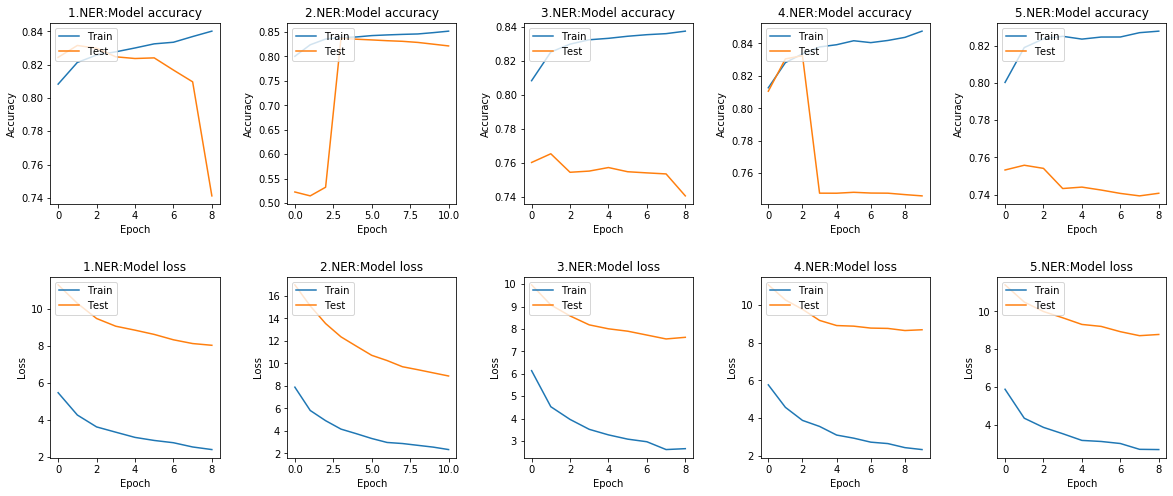

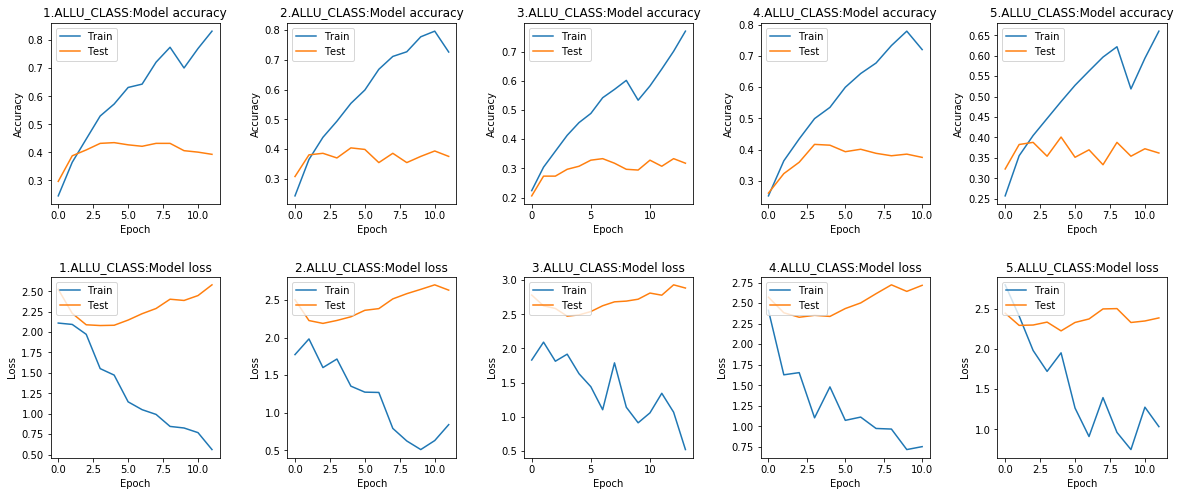

In [5]:
compute_mean_metrics(final_res)
plot_final_res(final_res)